# Linear regression with one variable 

Problem statement:  Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities.You would like to use this data to help you select which city to expand to next. 

In [2]:
import matplotlib.pyplot as plt
import pylab as pb
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("ex1data1.csv")

In [4]:
df.head()

,POPULATION,PROFIT
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279F8170860>,
      dtype=object)

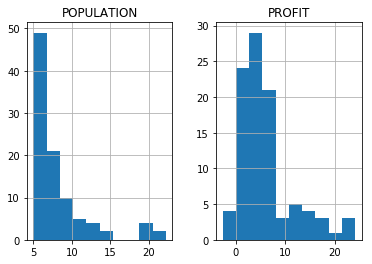

In [5]:
viz=df[['POPULATION','PROFIT']]
viz.hist()

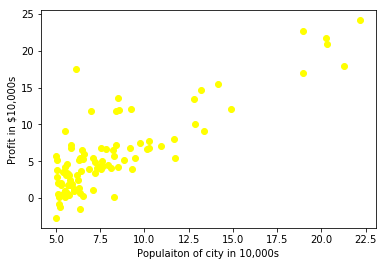

In [7]:
plt.scatter(df.POPULATION,df.PROFIT, color='yellow')
plt.xlabel("Populaiton of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [8]:
train=[]
test=[]
#making some train-testset 80-20 pattern
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [9]:
train

,POPULATION,PROFIT
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
6,7.4764,4.34830
8,6.4862,6.59870
10,5.7107,3.25220
12,5.7340,3.15510
13,8.4084,7.22580


In [10]:
test

,POPULATION,PROFIT
5,8.3829,11.88600
7,8.5781,12.00000
9,5.0546,3.81660
11,14.1640,15.50500
14,5.6407,0.71618
16,6.3654,5.30480
21,20.2700,21.76700
24,5.5649,3.08250
26,12.8280,13.50100
27,10.9570,7.04670


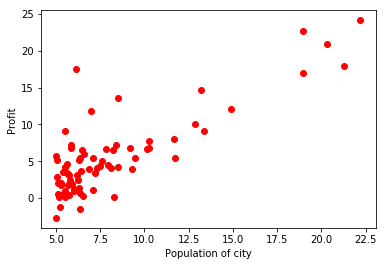

In [11]:
plt.scatter(train.POPULATION,train.PROFIT,color="red")
plt.xlabel("Population of city")
plt.ylabel("Profit")
plt.show()

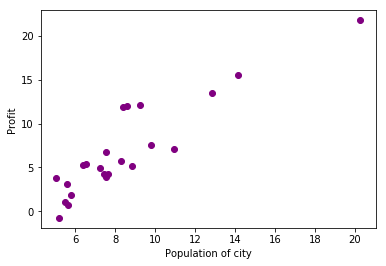

In [12]:
plt.scatter(test.POPULATION,test.PROFIT,color="purple")
plt.xlabel("Population of city")
plt.ylabel("Profit")
plt.show()

In [13]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['POPULATION']])
train_y=np.asanyarray(train[['PROFIT']])
regr.fit (train_x,train_y)

#inbuilt variable
print('Coefficient:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficient: [[1.14466162]]
Intercept: [-3.70248648]


Text(0,0.5,'profit')

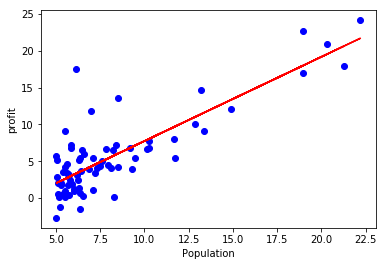

In [14]:
plt.scatter(train.POPULATION,train.PROFIT,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel("Population")
plt.ylabel("profit")

In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['POPULATION']])
test_y = np.asanyarray(test[['PROFIT']])
test_y_hat=regr.predict(test_x)

print("MEA: %.2f" %np.mean(np.absolute(test_y_hat-test_y)))
print("MSE: %.2f" %np.mean(np.absolute(test_y_hat-test_y)**2))
print("R2 score: %.2f" %r2_score(test_y_hat,test_y))

MEA: 1.98
MSE: 6.69
R2 score: 0.56
